In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df= pd.read_csv('Chocolate Sales (2).csv')

In [82]:
df['Amount'] = df['Amount'].str.replace('$', '', regex=False)
df['Amount'] = df['Amount'].str.replace(',','',regex=False)
df['Amount'] = df['Amount'].astype(float)

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


df['Date']=pd.to_datetime(df['Date'], dayfirst = True )
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['year_month']=df['Date'].dt.to_period('M')

df['Revenue_Per_Box'] = df['Amount'] / df['Boxes Shipped']
df['Revenue_Per_Box'] = df['Revenue_Per_Box'].replace([np.inf, -np.inf], np.nan)

print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nAmount range: ${df['Amount'].min():,.2f} to ${df['Amount'].max():,.2f}")
print(f'\nSample of processed data:')
df.head()


Date range: 2022-01-03 00:00:00 to 2024-08-31 00:00:00

Amount range: $7.00 to $26,170.95

Sample of processed data:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,month,year,Month_Name,year_month,Revenue_Per_Box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,1,2022,January,2022-01,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,8,2022,August,2022-08,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,7,2022,July,2022-07,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,4,2022,April,2022-04,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2,2022,February,2022-02,74.375000


In [83]:
# check for any remaining issues
print(f'\n total rows: {len(df)}')
print(f'\n Rows with missing Amount: {df['Amount'].isna().sum()}')
print(f'\n Rows with missing Date: {df['Date'].isna().sum()}')
print(f'\n Rows with negative Amount: {(df['Amount'] <= 0).sum()}')

df_clean = df.dropna(subset=['Amount', 'Date']).copy()

print(f"\nCleaned dataset rows: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")


 total rows: 3282

 Rows with missing Amount: 0

 Rows with missing Date: 0

 Rows with negative Amount: 0

Cleaned dataset rows: 3282
Rows removed: 0


In [84]:
print('=' * 60)
print("DATA OVERVIEW")
print('=' *60)
print(f'TOTEL  RECORDS: {len(df):,}')
print(f"Date Range: {df_clean['Date'].min().strftime('%B %d, %Y')} to {df_clean['Date'].max().strftime('%B %d, %Y')}")
print(f"TOTAL REVENUE: ${df_clean['Amount'].sum():,.2f}")
print(f"TOTAL SHIPPIN: {df_clean['Boxes Shipped'].sum():,}")
print(f'Average Revenue per Transaction: {df_clean['Amount'].mean():,.2f}')
print(f'Average box per Transaction: {df_clean['Boxes Shipped'].mean():,.2f}')

DATA OVERVIEW
TOTEL  RECORDS: 3,282
Date Range: January 03, 2022 to August 31, 2024
TOTAL REVENUE: $19,791,571.86
TOTAL SHIPPIN: 540,437
Average Revenue per Transaction: 6,030.34
Average box per Transaction: 164.67


In [85]:
for cols in df.columns:
  print(f'prodect name: {cols}')
  print(df_clean[cols].value_counts())
  print('=' * 60)
  print(f'unique values: {df_clean[cols].nunique():,}')
  print('=' * 60)


prodect name: Sales Person
Sales Person
Kelci Walkden          162
Brien Boise            159
Van Tuxwell            153
Beverie Moffet         150
Dennison Crosswaite    147
Oby Sorrel             147
Ches Bonnell           144
Karlen McCaffrey       141
Gigi Bohling           141
Curtice Advani         138
Kaine Padly            135
Madelene Upcott        135
Marney O'Breen         135
Barr Faughny           129
Jehu Rudeforth         129
Roddy Speechley        129
Gunar Cockshoot        129
Mallorie Waber         123
Jan Morforth           117
Andria Kimpton         117
Husein Augar           114
Dotty Strutley         108
Wilone O'Kielt         102
Rafaelita Blaksland    102
Camilla Castle          96
Name: count, dtype: int64
unique values: 25
prodect name: Country
Country
Australia      615
India          552
USA            537
UK             534
Canada         525
New Zealand    519
Name: count, dtype: int64
unique values: 6
prodect name: Product
Product
50% Dark Bites          

In [86]:
print('=' * 60)
print("DESCRIBE")
print('=' * 60)
df_clean[['Amount','Boxes Shipped','Revenue_Per_Box']].describe()

DESCRIBE


,Amount,Boxes Shipped,Revenue_Per_Box
count,3282.000000,3282.000000,3282.000000
mean,6030.338775,164.666971,111.340158
std,4393.980200,124.024736,295.314947
min,7.000000,1.000000,0.013514
25%,2521.495000,71.000000,15.460976
50%,5225.500000,137.000000,38.192954
75%,8556.842500,232.000000,83.808388
max,26170.950000,778.000000,4692.360000


In [87]:
print("=" * 60)
print("TOP 10 PRODUCTS BY REVENUE")
print("=" * 60)
top_products = df_clean.groupby('Product')['Amount'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False).head(10)
top_products.columns = ['Total Revenue', 'Avg Revenue', 'Transaction Count']
top_products['Total Revenue'] = top_products['Total Revenue'].apply(lambda x: f"${x:,.2f}")
top_products['Avg Revenue'] = top_products['Avg Revenue'].apply(lambda x: f"${x:,.2f}")
print(top_products)

TOP 10 PRODUCTS BY REVENUE
                     Total Revenue Avg Revenue  Transaction Count
Product                                                          
Smooth Sliky Salty   $1,120,201.09   $6,328.82                177
50% Dark Bites       $1,087,659.35   $6,042.55                180
White Choc           $1,054,257.00   $6,058.95                174
Peanut Butter Cubes  $1,036,591.09   $7,051.64                147
Eclairs                $996,947.96   $5,538.60                180
99% Dark & Pure        $960,033.45   $6,530.84                147
85% Dark Bars          $955,268.24   $6,368.45                150
Organic Choco Syrup    $945,345.73   $6,059.91                156
Spicy Special Slims    $938,131.69   $5,790.94                162
Mint Chip Choco        $904,989.55   $6,703.63                135


In [88]:
print("=" * 60)
print("TOP 10 COUNTRIES BY REVENUE")
print("=" * 60)
top_countries =  df_clean.groupby('Country')['Amount'].agg(['sum','mean','count']).sort_values('sum', ascending=False).head(10)
top_countries.columns = ['Total revenue','Avg Revenue','Transaction Count']
top_countries['Total revenue'] = top_countries['Total revenue'].apply(lambda x:f"${x:,.2f}")
top_countries['Avg Revenue'] = top_countries['Avg Revenue'].apply(lambda x:f"${x:,.2f}")
print(top_countries)

TOP 10 COUNTRIES BY REVENUE
             Total revenue Avg Revenue  Transaction Count
Country                                                  
Australia    $3,646,444.35   $5,929.18                615
UK           $3,365,388.90   $6,302.23                534
India        $3,343,730.83   $6,057.48                552
USA          $3,313,858.09   $6,171.06                537
Canada       $3,078,495.65   $5,863.80                525
New Zealand  $3,043,654.04   $5,864.46                519


In [89]:
print("=" * 60)
print("TOP 10 COUNTRY_BOX_SHIPPED")
print("=" * 60)
top_shipped = df_clean.groupby('Country', as_index = False)['Boxes Shipped'].sum().sort_values(by ='Boxes Shipped', ascending=False).head(10)
print(top_shipped)

TOP 10 COUNTRY_BOX_SHIPPED
       Country  Boxes Shipped
0    Australia          99618
1       Canada          95158
4           UK          92523
2        India          89968
5          USA          81820
3  New Zealand          81350


In [90]:
best_prodect = df_clean.groupby('Product').agg(
    total_amount = ('Amount','sum'),
    total_boxes = ('Boxes Shipped','sum'),
    avg_revenu_per = ('Revenue_Per_Box','mean')
)


In [91]:
best_prodect.sort_values(by='total_amount',ascending=False)

,total_amount,total_boxes,avg_revenu_per
Product,,,
Smooth Sliky Salty,1120201.09,26969,92.188668
50% Dark Bites,1087659.35,29810,117.096311
White Choc,1054257.00,25158,246.487640
Peanut Butter Cubes,1036591.09,25339,96.841860
Eclairs,996947.96,26678,124.347012
99% Dark & Pure,960033.45,24818,155.224428
85% Dark Bars,955268.24,23828,109.348544
Organic Choco Syrup,945345.73,23602,96.722694
Spicy Special Slims,938131.69,26662,126.797867


In [92]:
Best_sales_person = df_clean.groupby('Sales Person').agg(
    total_amount = ('Amount','sum'),
    total_boxes = ('Boxes Shipped','sum')
)

In [93]:
Best_sales_person.sort_values(by='total_amount',ascending = False)

,total_amount,total_boxes
Sales Person,,
Ches Bonnell,1022599.96,23070
Oby Sorrel,1017204.12,26390
Madelene Upcott,1010028.72,22199
Kelci Walkden,1002929.10,26605
Brien Boise,997326.48,24738
Van Tuxwell,974425.09,20627
Dennison Crosswaite,931849.57,26862
Beverie Moffet,892421.37,28027
Kaine Padly,849062.76,22134


In [98]:
product_margin = (
    df_clean
    .groupby('Product')['Revenue_Per_Box']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .to_frame(name = 'Revenue_Per_Box')
)

print(product_margin)

                      Revenue_Per_Box
Product                              
White Choc                 246.487640
Mint Chip Choco            169.830736
99% Dark & Pure            155.224428
Choco Coated Almonds       127.188276
Orange Choco               126.969960
Spicy Special Slims        126.797867
Eclairs                    124.347012
50% Dark Bites             117.096311
Fruit & Nut Bars           113.930505
85% Dark Bars              109.348544


<Axes: xlabel='Month_Name', ylabel='Amount'>

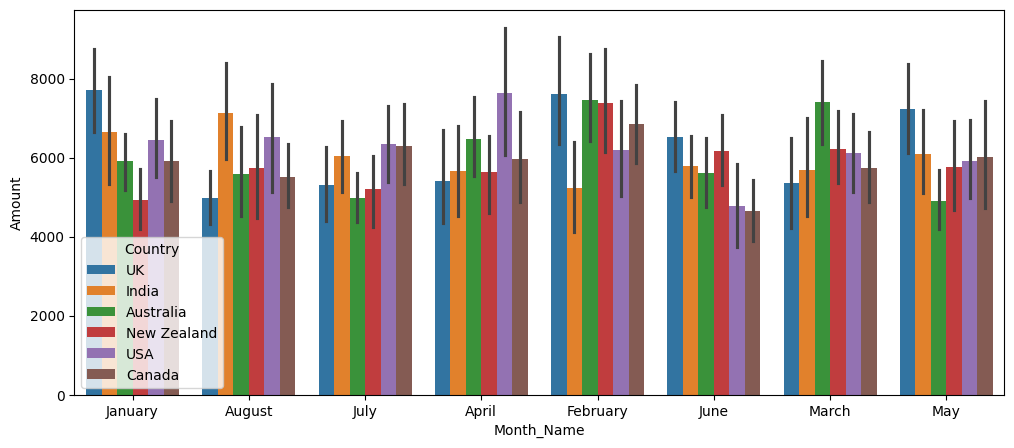

In [99]:
plt.figure(figsize=(12, 5))
sns.barplot(df,x='Month_Name',y='Amount',hue ='Country')

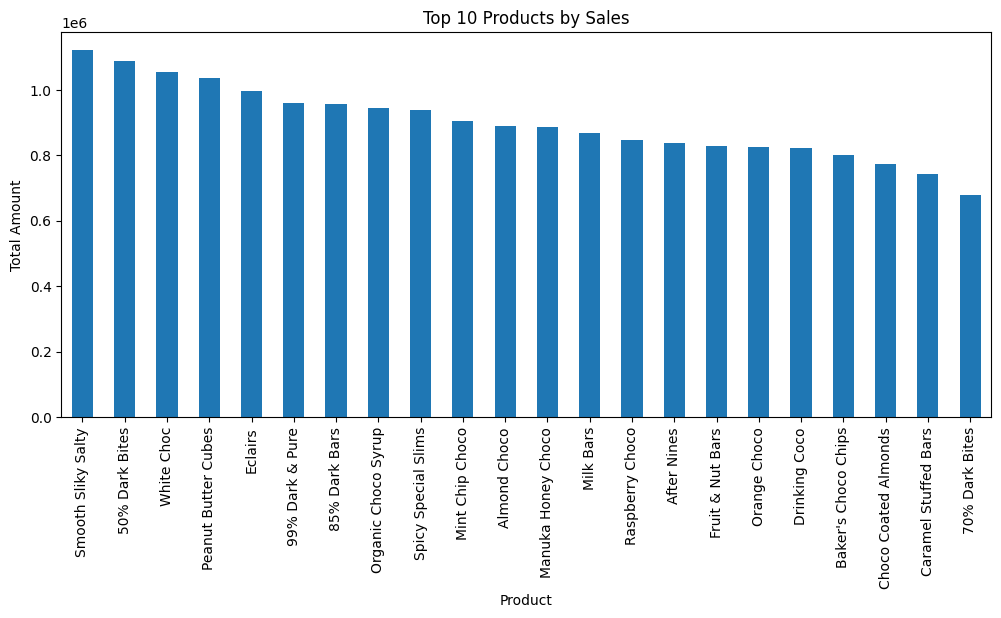

In [100]:
country_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
country_sales.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Amount")
plt.show()

<Figure size 1200x500 with 0 Axes>

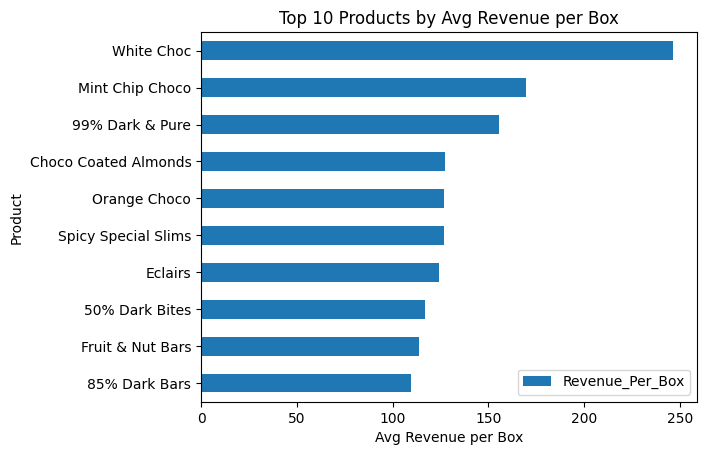

In [101]:
plt.figure(figsize=(12,5))
product_margin.plot(kind='barh')
plt.title("Top 10 Products by Avg Revenue per Box")
plt.xlabel("Avg Revenue per Box")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.show()